In [13]:
import SimpleITK as sitk
import nibabel as nib
import os
import numpy as np
from glob import glob
import time
from scipy import misc
import re
import matplotlib.pyplot as plt
import pandas as pd
import cv2

def load_mhd(file_name):
    sitk_img = sitk.ReadImage(file_name)
    img = sitk.GetArrayFromImage(sitk_img)  # indexes are z,y,x (notice the ordering)
    origin = sitk_img.GetOrigin()           # x,y,z  Origin in world coordinates (mm)
    spacing = sitk_img.GetSpacing()         # spacing of voxels in world coor. (mm)
    direction = sitk_img.GetDirection()     
    return img.astype('float32'), np.asarray(origin), np.asarray(spacing), direction


def zoom(img, new_shape, new_spacing, old_spacing, origin, direction, label=False):
    sitk_img = sitk.GetImageFromArray(img)
    sitk_img.SetOrigin(origin)
    sitk_img.SetSpacing(old_spacing)
    sitk_img.SetDirection(direction)

    resample = sitk.ResampleImageFilter()
    if (label == True):
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    resample.SetOutputDirection(sitk_img.GetDirection())
    resample.SetOutputOrigin(sitk_img.GetOrigin())
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(new_shape)
    newimage = resample.Execute(sitk_img)

    return newimage

def load_dicom(case_path):
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(case_path)
    reader.SetFileNames(dicom_names)
    sitk_img = reader.Execute()
    img = sitk.GetArrayFromImage(sitk_img)
    origin = sitk_img.GetOrigin()
    spacing = sitk_img.GetSpacing()
    direction = sitk_img.GetDirection()

    return img.astype('float32'), np.asarray(origin), np.asarray(spacing), direction

def load_png(case_path):
    image_paths = glob(case_path + '/*')
    img = []
#     print(image_paths)
    for path in image_paths:
        image_slice = cv2.imread(path)[:,:,0]
        img.append(image_slice)
    img = np.array(img)
    return img.astype('float32')



In [3]:
image_folder = 'G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/image'
label_folder = 'G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label'
label_list = glob(label_folder + '/*.nii.gz')

labels_info = []
images_info = []
for file in label_list:
    print(file)
    label = load_mhd(file)
    labels_info.append(label)
    image_path = file.replace('/label\\label','/image/img')
#     print(file.replace('/label\\label','/image/TCIA_'))
    image = load_mhd(image_path)
    images_info.append(image)

G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0001.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0002.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0003.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0004.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0005.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0006.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0007.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0008.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0009.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0010.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0021.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0022.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0023.nii.gz
G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/label\label0024

In [4]:
for image_info,label_info,label_fname in zip(images_info,labels_info,label_list):
    
    image_array_original, origin, spacing, direction = image_info
#     image_array = image

#     label = sitk.ReadImage(data[:-7] + '_segmentation.nii.gz')
    label_array_original = label_info[0]
    image_array = image_array_original.copy()
    label_array = label_array_original.copy()
    print(np.unique(label_array))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 0.  1.  2.

[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0001
(82, 512, 512) (82, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0002
(56, 512, 512) (56, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0003
(91, 512, 512) (91, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0004
(58, 512, 512) (58, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0005
(80, 512, 512) (80, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0006
(55, 512, 512) (55, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0007
(80, 512, 512) (80, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0008
(56, 512, 512) (56, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0009
(119, 512, 512) (119, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]

<ipython-input-9-4d3d84afd42f>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


0030
(63, 512, 512) (63, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0031
(67, 512, 512) (67, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0032
(61, 512, 512) (61, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0033
(45, 512, 512) (45, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0034
(45, 512, 512) (45, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  6.  7. 11.]
[0. 1. 2. 4. 5. 6.]
0035
(41, 512, 512) (41, 512, 512)
[0. 1. 2. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0036
(70, 512, 512) (70, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0037
(37, 512, 512) (37, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0038
(45, 512, 512) (45, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0039
(41, 5

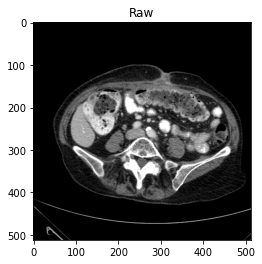

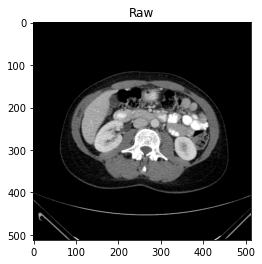

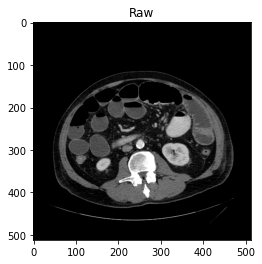

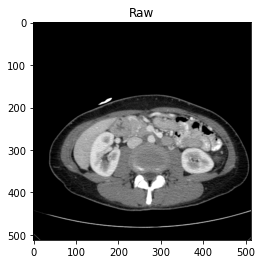

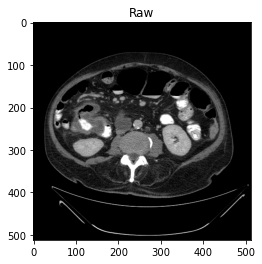

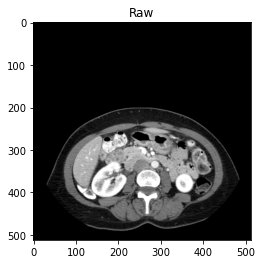

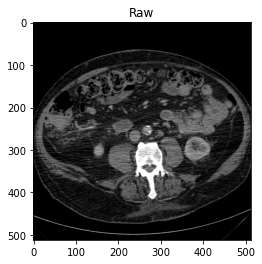

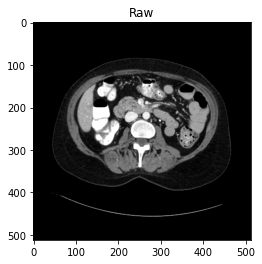

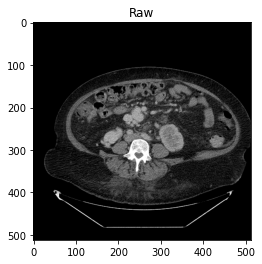

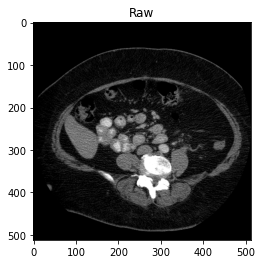

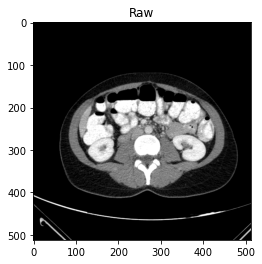

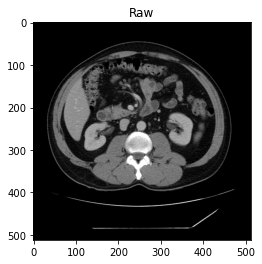

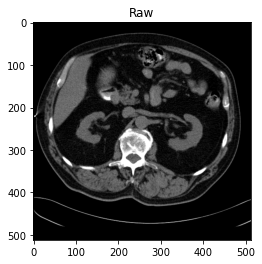

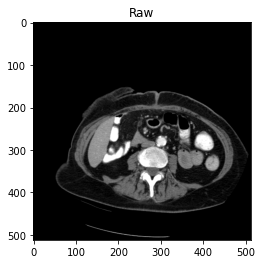

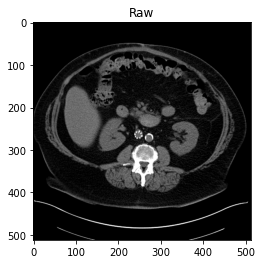

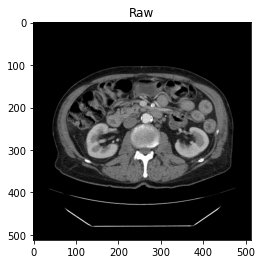

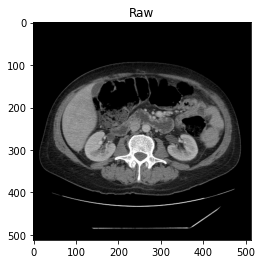

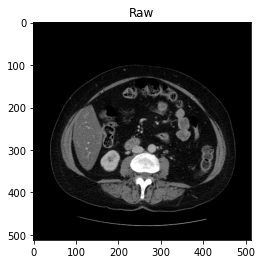

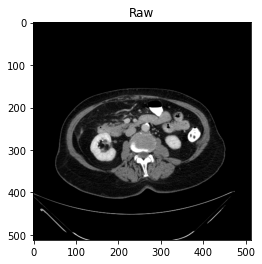

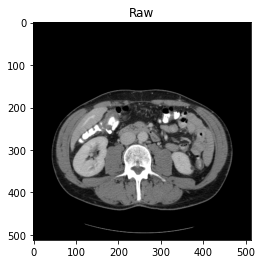

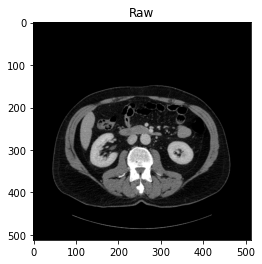

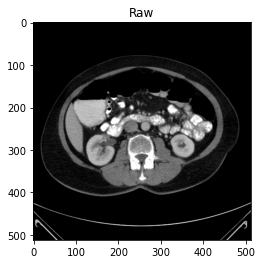

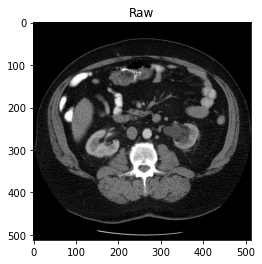

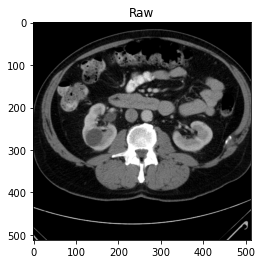

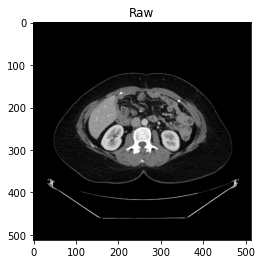

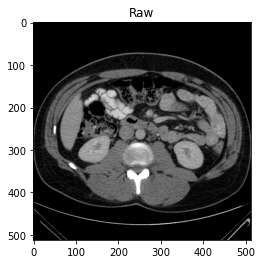

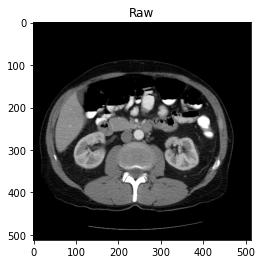

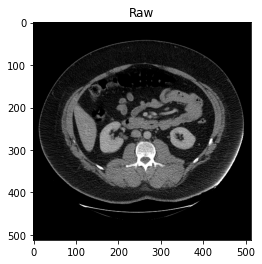

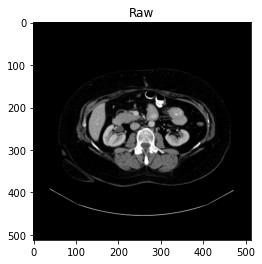

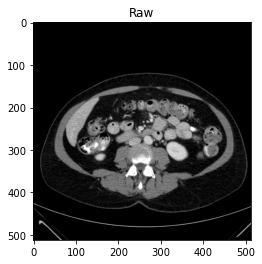

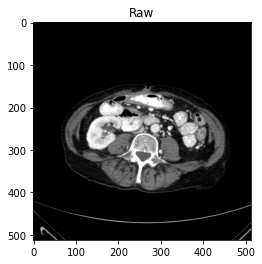

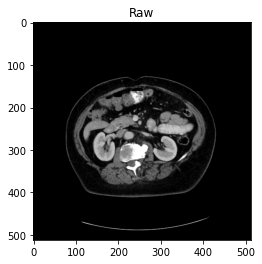

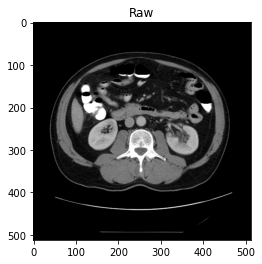

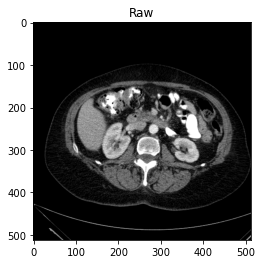

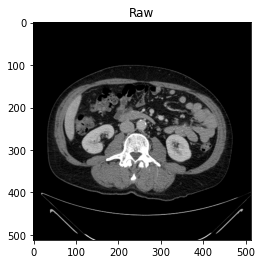

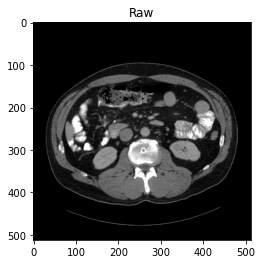

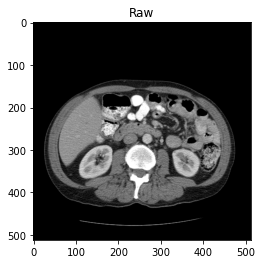

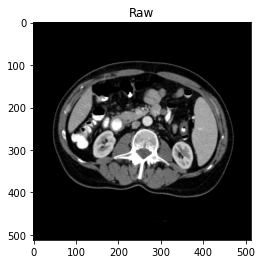

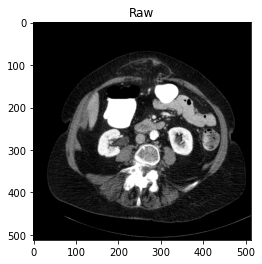

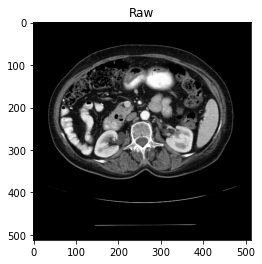

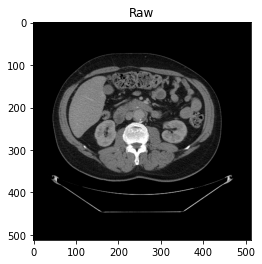

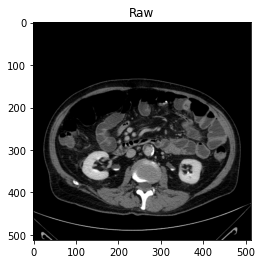

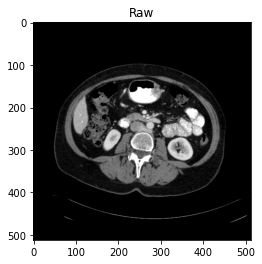

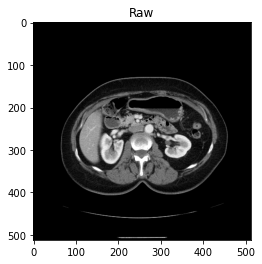

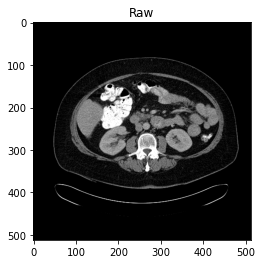

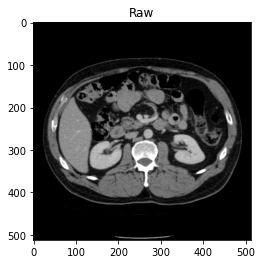

<Figure size 432x288 with 0 Axes>

In [9]:
# cropping_csv = pd.read_csv('G:/Dataset/Multi-organ Abdominal/TCIA+BTCV/cropping.csv')
target_path = 'G:/Dataset/Multi-organ-Abdominal/BTCV/Unofficial/6organs/'

for image_info,label_info,label_fname in zip(images_info,labels_info,label_list):
    
    image_array_original, origin, spacing, direction = image_info
#     image_array = image

#     label = sitk.ReadImage(data[:-7] + '_segmentation.nii.gz')
    label_array_original = label_info[0]
    image_array = image_array_original.copy()
    label_array = label_array_original.copy()
#     print(np.unique(label_array))
    mask = np.zeros(label_array.shape)
    # 6 classes
    for c in [1,3,4,6,7,11]:
        mask += (label_array==c)
#     mask = (label_array==1) + (label_array==3) + (label_array==6)
    label_array *= mask
    print(np.unique(label_array))
    origin_classes_list = [0,1,3,4,6,7,11]
    for c in origin_classes_list:
        label_array[label_array==c] = origin_classes_list.index(c)
    print(np.unique(label_array))

    Crop_limZ, Crop_limY, Crop_limX = np.where(mask == 1)
    Crop_minZ = np.min(Crop_limZ)
    Crop_maxZ = np.max(Crop_limZ)
    
    image_array = image_array[:,::-1,:]
    label_array = label_array[:,::-1,:]
    
    image_array = image_array[Crop_minZ-1:Crop_maxZ+2,:,:]
    label_array = label_array[Crop_minZ-1:Crop_maxZ+2,:,:]
    
    image_array = np.clip(image_array, -125, 275)
    
    plt.imshow(image_array[10],cmap='gray')
    plt.title('Raw')
    plt.figure()
    
    
    file_id = (os.path.basename(label_fname.split('.')[0][-4:]))
    print(file_id)
    print(image_array.shape, label_array.shape)
    print(np.unique(label_array))
    
    
    
    

    old_shape_z, old_shape_y, old_shape_x = image_array.shape
    old_shape = [old_shape_x, old_shape_y, old_shape_z]
    new_shape = np.array([384, 384, old_shape_z])
    new_spacing = np.array(spacing) / (new_shape * 1.0 / np.array(old_shape))
    new_shape = new_shape.tolist()
#     direction = (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
    


    
    final_image = zoom(image_array, new_shape, new_spacing, spacing, origin, direction)
    final_label = zoom(label_array, new_shape, new_spacing, spacing, origin, direction, label=True)
    sitk.WriteImage(final_image, target_path + 'BTCV_' + str(file_id) + '.nii.gz') 
    sitk.WriteImage(final_label, target_path + 'BTCV_' + str(file_id) + '_segmentation.nii.gz')


In [16]:
image_folder = 'G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/image'
label_folder = 'G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label'
label_list = glob(label_folder + '/*.nii.gz')
labels_info = []
images_info = []
for file in label_list:
    print(file)
    label = load_mhd(file)
    labels_info.append(label)
    image_path = file.replace('/label\\label','/image/TCIA_')
#     print(file.replace('/label\\label','/image/TCIA_'))
    image = load_mhd(image_path)
    images_info.append(image)

G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0002.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0003.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0004.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0005.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0006.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0007.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0008.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0010.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0011.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0012.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0013.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0014.nii.gz
G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/label\label0016.nii.gz

In [17]:
for image_info,label_info,label_fname in zip(images_info,labels_info,label_list):
    
    image_array_original, origin, spacing, direction = image_info
    label_array_original = label_info[0]
    image_array = image_array_original.copy()
    label_array = label_array_original.copy()
    print(np.unique(label_array))

[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  4.  5.  6.  7. 11. 14.]
[ 0.  1.  3.  5.

[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0002
(180, 512, 512) (180, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 60]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0003
(193, 512, 512) (193, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 64]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0004
(205, 512, 512) (205, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 68]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0005
(180, 512, 512) (180, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 60]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0006
(193, 512, 512) (193, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 64]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0007
(189, 512, 512) (189, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 63]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0008
(189, 512, 512) (189, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 63]
[ 0.  1.  3.  4.  6.  7. 11

<ipython-input-31-136ef8b86a1a>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


0024
(168, 512, 512) (168, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 56]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0026
(204, 512, 512) (204, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 68]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0027
(189, 512, 512) (189, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 63]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0028
(168, 512, 512) (168, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 56]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0029
(184, 512, 512) (184, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 61]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0030
(246, 512, 512) (246, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 82]
[ 0.  1.  3.  4.  6.  7. 11.]
[0. 1. 2. 3. 4. 5. 6.]
0031
(192, 512, 512) (192, 512, 512)
[0. 1. 2. 3. 4. 5. 6.]
New shape: [384, 384, 64]
[ 0.  1.  3.  6.  7. 11.]
[0. 1. 2. 4. 5. 6.]
0032
(219, 512, 512) (219, 512, 51

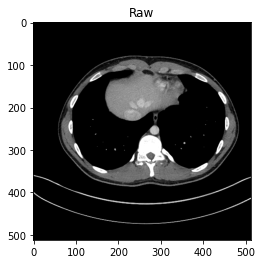

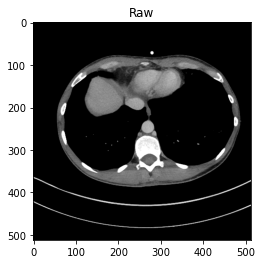

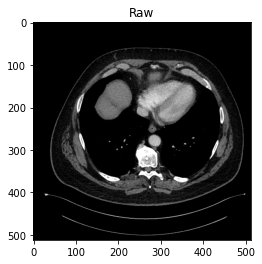

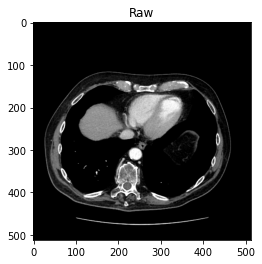

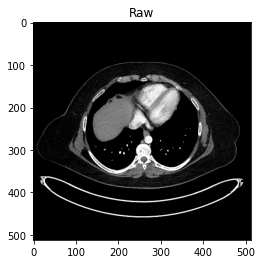

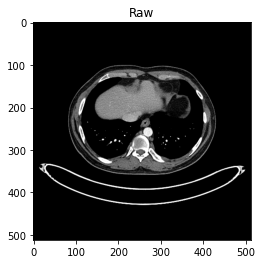

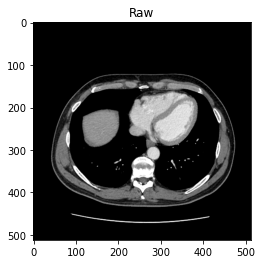

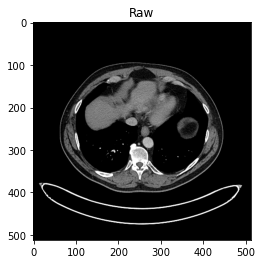

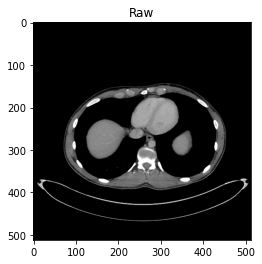

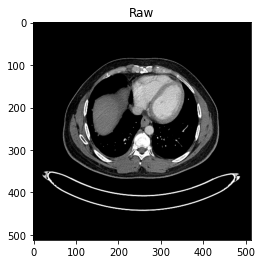

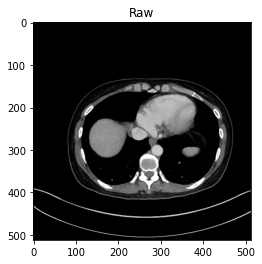

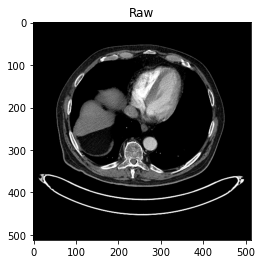

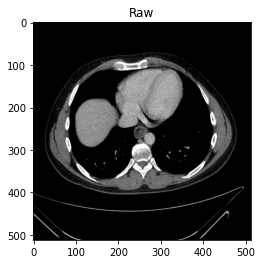

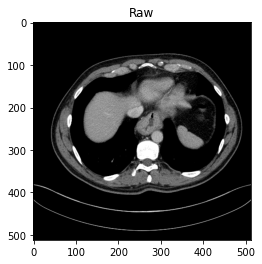

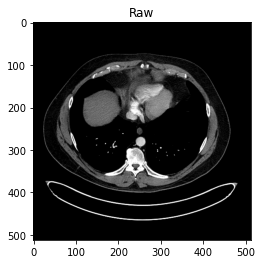

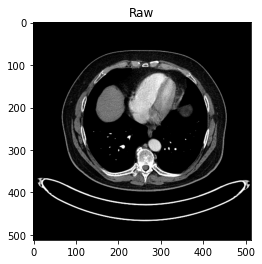

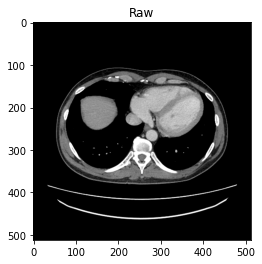

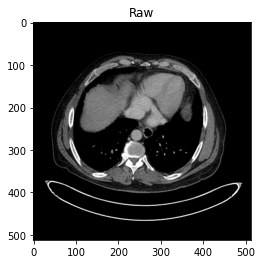

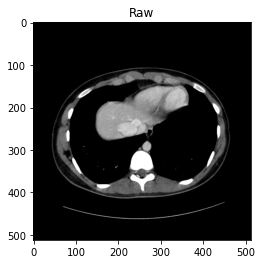

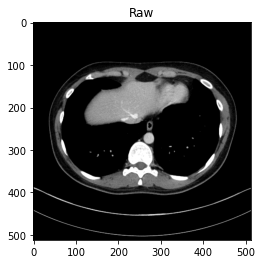

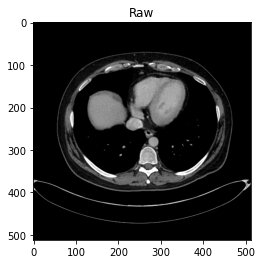

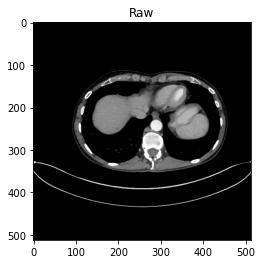

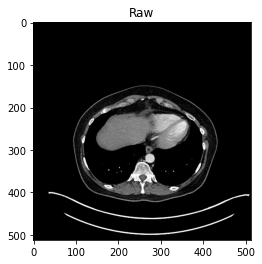

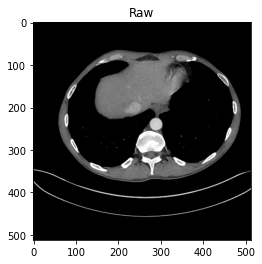

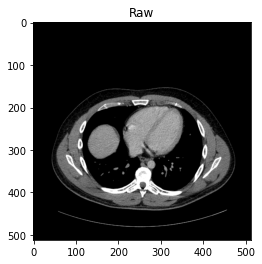

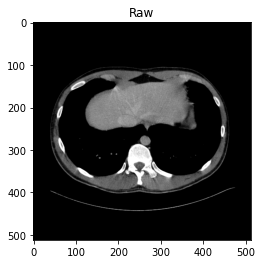

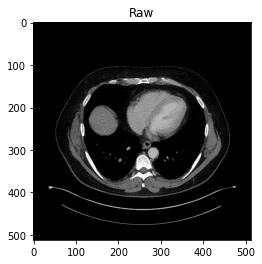

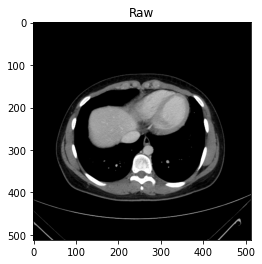

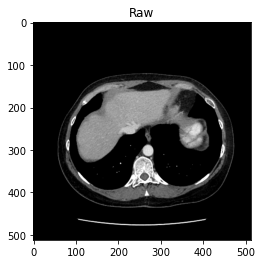

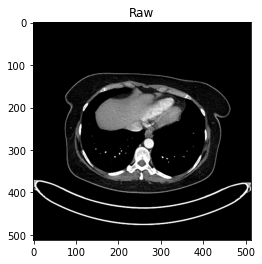

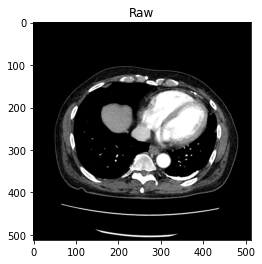

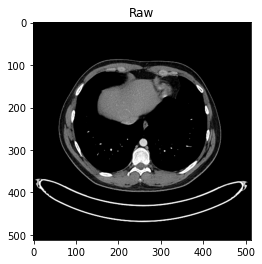

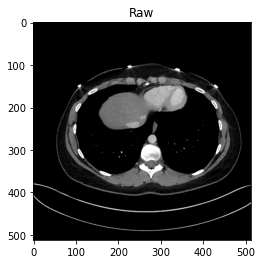

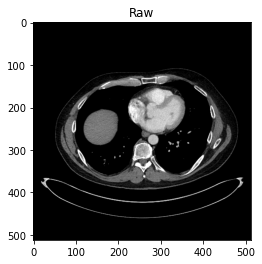

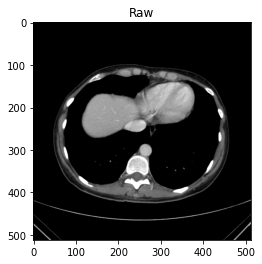

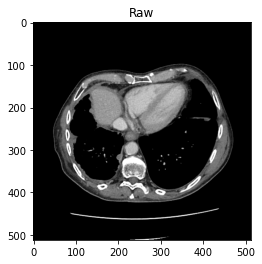

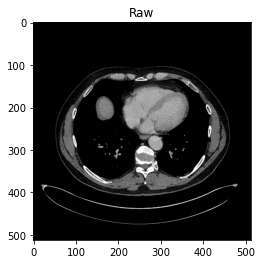

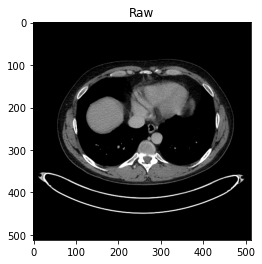

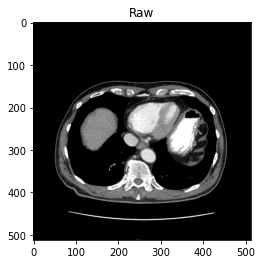

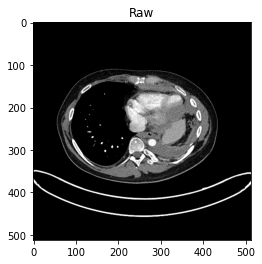

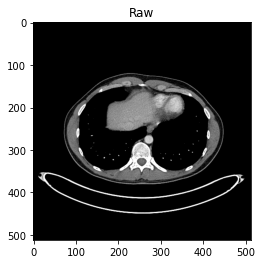

<Figure size 432x288 with 0 Axes>

In [31]:
# cropping_csv = pd.read_csv('G:/Dataset/Multi-organ Abdominal/TCIA+BTCV/cropping.csv')
target_path = 'G:/Dataset/Multi-organ-Abdominal/TCIA/Pancreas-CT-nii/6organs/'

for image_info,label_info,label_fname in zip(images_info,labels_info,label_list):
    
    image_array_original, origin, spacing, direction = image_info
#     image_array = image

#     label = sitk.ReadImage(data[:-7] + '_segmentation.nii.gz')
    label_array_original = label_info[0]
    image_array = image_array_original.copy()
    label_array = label_array_original.copy()
#     print(np.unique(label_array))
    mask = np.zeros(label_array.shape)
    # 6 classes
    for c in [1,3,4,6,7,11]:
        mask += (label_array==c)
#     mask = (label_array==1) + (label_array==3) + (label_array==6)
    label_array *= mask
    print(np.unique(label_array))
    origin_classes_list = [0,1,3,4,6,7,11]
    for c in origin_classes_list:
        label_array[label_array==c] = origin_classes_list.index(c)
    print(np.unique(label_array))
#     label_array[label_array==11] = 5
#     label_array[label_array==3] = 2
#     label_array[label_array==6] = 3
    Crop_limZ, Crop_limY, Crop_limX = np.where(mask == 1)
    Crop_minZ = np.min(Crop_limZ)
    Crop_maxZ = np.max(Crop_limZ)
    
    image_array = image_array[::-1,::-1,:]
    label_array = label_array[:,::-1,:]
    
    image_array = image_array[Crop_minZ-1:Crop_maxZ+2,:,:]
    label_array = label_array[Crop_minZ-1:Crop_maxZ+2,:,:]
    
    image_array = np.clip(image_array, -125, 275)
    
    plt.imshow(image_array[10],cmap='gray')
    plt.title('Raw')
    plt.figure()
    
    
    file_id = (os.path.basename(label_fname.split('.')[0][-4:]))
    print(file_id)
#     cropping_info = cropping_csv[(cropping_csv.publisher=='Synapse') & (cropping_csv.original_id==file_id)]
#     print(cropping_info.values.tolist()[0])
#     crop_index = cropping_info.values.tolist()[0][-6:]

#     new_image_array = image_array[:, crop_index[0]:crop_index[1],crop_index[2]:crop_index[3]]
#     new_label_array = label_array[:, crop_index[0]:crop_index[1],crop_index[2]:crop_index[3]]
    print(image_array.shape, label_array.shape)
    print(np.unique(label_array))
    
    
    
    

    old_shape_z, old_shape_y, old_shape_x = image_array.shape
    old_shape = [old_shape_x, old_shape_y, old_shape_z]
    
    new_shape = np.array([384, 384, old_shape_z])
    #resample with z axis
    new_shape[2] = new_shape[2]//3
    new_spacing = np.array(spacing) / (new_shape * 1.0 / np.array(old_shape))
    new_shape = new_shape.tolist()
#     direction = (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
    direction = (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
    image_array = image_array[::-1,:,:]
    label_array = label_array[::-1,:,:]

    print('New shape:', new_shape)
    final_image = zoom(image_array, new_shape, new_spacing, spacing, origin, direction)
    final_label = zoom(label_array, new_shape, new_spacing, spacing, origin, direction, label=True)
    sitk.WriteImage(final_image, target_path + 'TCIA_' + str(file_id) + '.nii.gz') 
    sitk.WriteImage(final_label, target_path + 'TCIA_' + str(file_id) + '_segmentation.nii.gz')
